In [41]:
# Import modules

In [7]:
%load_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [9]:

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import extra_graphs

In [10]:
# Read Data and creating a DataFrame

In [11]:
customers = pd.read_csv(r"C:\Users\sohit\project own\Untitled Folder\customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Exploring the Data

In [13]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
customers.duplicated().sum()

0

In [15]:
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [16]:
# Descriptive statistics and Distribution.


In [17]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [18]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

In [19]:
spending = customers["Spending Score (1-100)"]
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


C:\Users\sohit\OneDrive\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



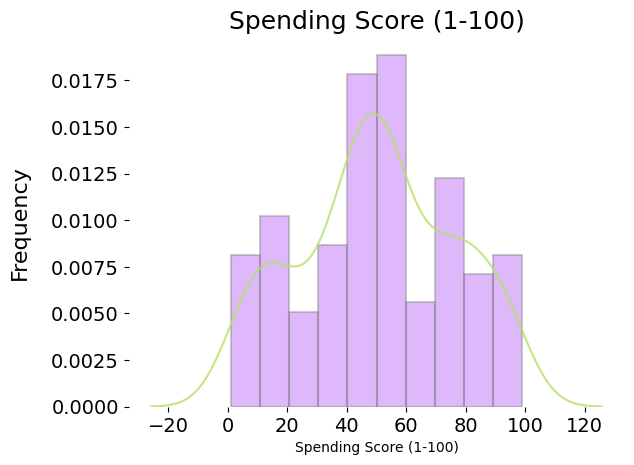

In [20]:
graph_histo(spending)

In [21]:
age = customers["Age"]
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


C:\Users\sohit\OneDrive\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



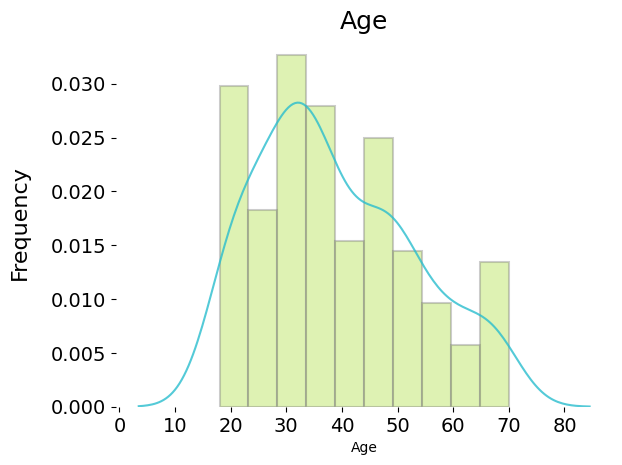

In [22]:
graph_histo(age)


In [23]:
income = customers["Annual Income (k$)"]
statistics(income)


,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


C:\Users\sohit\OneDrive\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



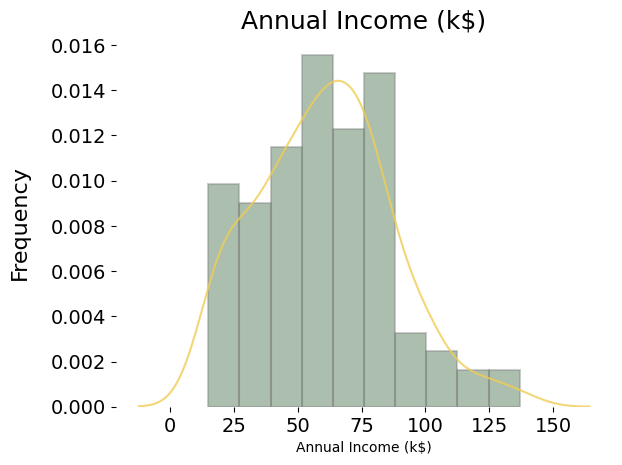

In [24]:
graph_histo(income)


In [25]:
gender = customers["Gender"]
statistics(gender)


,Gender
Female,112
Male,88


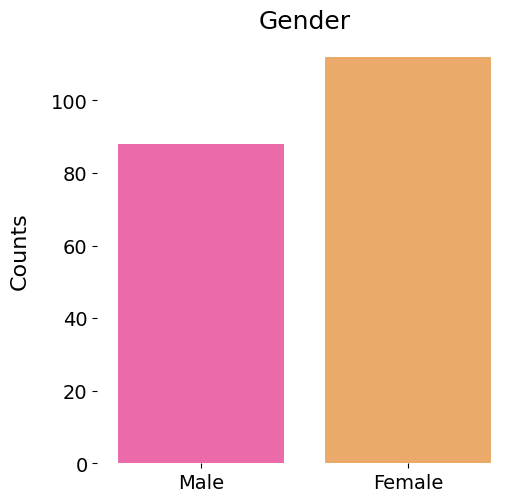

In [26]:
graph_histo(gender)


In [27]:
# Correlation between parameteres


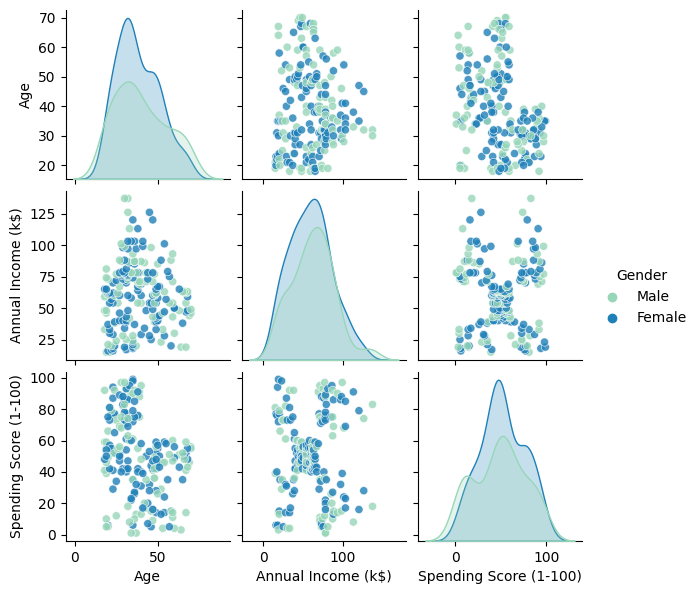

In [28]:
sns.pairplot(customers, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8})

In [29]:
# Dimensionality reduction
# Principal Component Analysis (PCA)


In [30]:
customers["Male"] = customers.Gender.apply(lambda x: 0 if x == "Male" else 1)
customers["Female"] = customers.Gender.apply(lambda x: 0 if x == "Female" else 1)


In [32]:
# Standardize the data
X = customers.iloc[:, 2:]
X_std = (X - X.mean()) / X.std()
X_std.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,-1.421003,-1.734646,-0.433713,-1.125328,1.125328
1,-1.277829,-1.734646,1.192711,-1.125328,1.125328
2,-1.349416,-1.696572,-1.711618,0.884186,-0.884186
3,-1.134655,-1.696572,1.037814,0.884186,-0.884186
4,-0.561958,-1.658498,-0.394989,0.884186,-0.884186


In [33]:
# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
print(pca.components_)


[[ 0.11855625  0.07390773 -0.11585755 -0.69536289  0.69536289]
 [ 0.69484399 -0.0910454  -0.69546061  0.11233235 -0.11233235]]


In [35]:
print(pca.explained_variance_)
# Transform samples using the PCA fit
pca_2d = pca.transform(X_std)

[2.02605498 1.30946143]


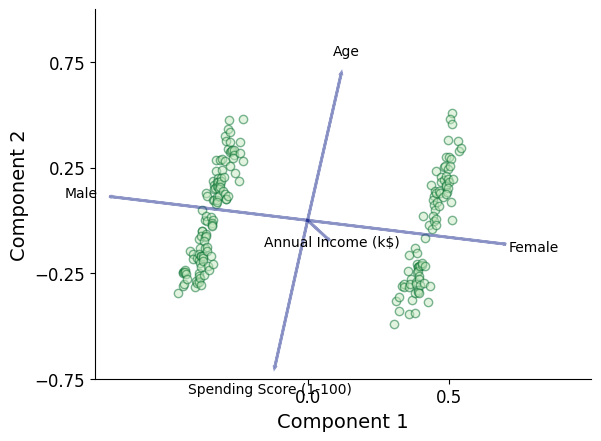

In [36]:
extra_graphs.biplot(pca_2d[:,0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)

In [37]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

C:\Users\sohit\OneDrive\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



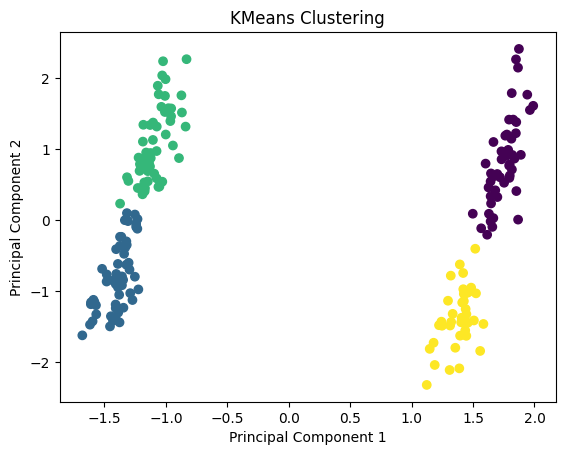

In [38]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()

Imagine that tomorrow we have a new member. And we want to know which segment that person belongs. We can predict this.

In [39]:
X_new = np.array([[43, 76]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 0
